O dataset contém 6497 observações e 13 variáveis, sendo que a variável de interesse é a qualidade do vinho ("quality"). As características dos vinhos incluem variáveis como acidez, açúcar residual, cloretos, dióxido de enxofre, densidade, pH, sulfatos, teor alcoólico, entre outras. Além disso, há uma coluna "tipo" que indica se o vinho é "tinto" ou "branco".

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('data/vinhoVerde.csv')
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides numeric     6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  tipo                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


(None,
    fixed acidity  volatile acidity  citric acid  residual sugar  \
 0            7.4              0.70         0.00             1.9   
 1            7.8              0.88         0.00             2.6   
 2            7.8              0.76         0.04             2.3   
 3           11.2              0.28         0.56             1.9   
 4            7.4              0.70         0.00             1.9   
 
    chlorides numeric  free sulfur dioxide  total sulfur dioxide  density  \
 0              0.076                 11.0                  34.0   0.9978   
 1              0.098                 25.0                  67.0   0.9968   
 2              0.092                 15.0                  54.0   0.9970   
 3              0.075                 17.0                  60.0   0.9980   
 4              0.076                 11.0                  34.0   0.9978   
 
      pH  sulphates  alcohol  quality   tipo  
 0  3.51       0.56      9.4        5  tinto  
 1  3.20       0.68      

In [9]:
# Separate features and target variable
X = df.drop(columns=['quality', 'tipo'])  # Exclude 'quality' and 'tipo' as features
y = df['quality']


In [10]:
# Split the dataset: 75% for training, 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [11]:
# Train a decision tree regressor
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [12]:
# Predict on the test set
y_pred = decision_tree.predict(X_test)

In [13]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


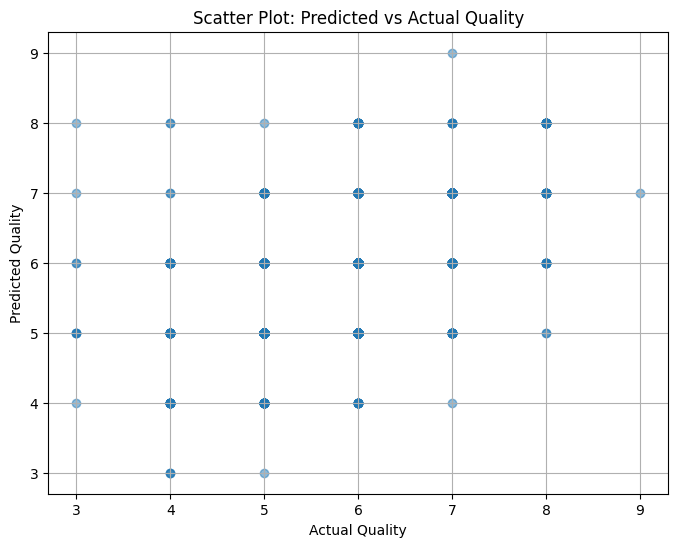

In [14]:
# Plot scatter plot (Predicted vs Actual values)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Scatter Plot: Predicted vs Actual Quality")
plt.grid(True)
plt.show()


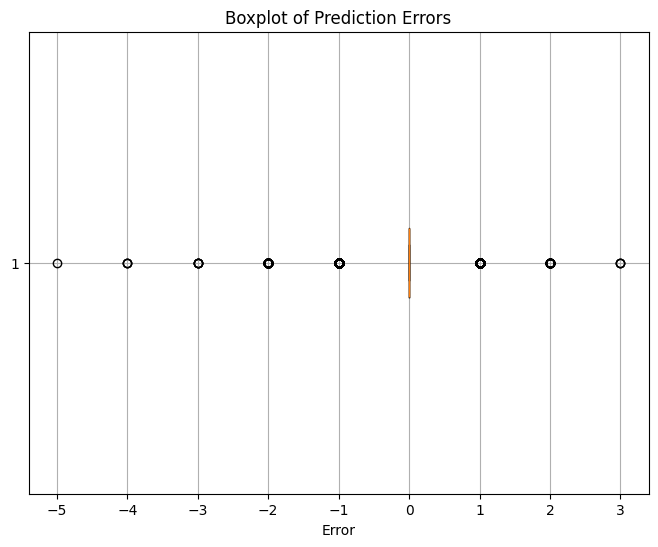

In [15]:
# Boxplot of prediction errors
errors = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.boxplot(errors, vert=False)
plt.title("Boxplot of Prediction Errors")
plt.xlabel("Error")
plt.grid(True)
plt.show()


In [16]:

# Return RMSE result
rmse

np.float64(0.8499773752645058)

A árvore de decisão treinada resultou num RMSE (Root Mean Squared Error) de aproximadamente 0,85.

Interpretação dos resultados:
Scatter Plot: O gráfico de dispersão entre as previsões e os valores reais mostra que, embora haja alguma correlação entre os valores previstos e reais, as previsões não são perfeitamente alinhadas com os valores reais. Isto indica que o modelo tem limitações na capacidade de prever a qualidade com precisão.

Boxplot dos Erros: O boxplot mostra a distribuição dos erros de previsão. Embora a maioria dos erros esteja concentrada próximo de zero, há uma dispersão que sugere erros significativos em alguns casos.

Conclusão:
Os resultados são aceitáveis, mas longe de ideais. A RMSE de 0,85 é relativamente alta, sugerindo que o modelo de árvore de decisão pode não estar a capturar todas as variações nas características dos vinhos que afetam a qualidade.

Potenciais causas para desempenho insatisfatório:
Complexidade da Tarefa: A qualidade do vinho pode ser influenciada por fatores complexos, que uma árvore de decisão simples pode não ser capaz de modelar bem.
Ruído nos Dados: A variável de "qualidade" pode ter ruído, ou seja, as avaliações podem ser subjetivas ou não totalmente consistentes, dificultando previsões exatas.
Modelo Simples: A árvore de decisão pode ser um modelo demasiado simples para este problema. Modelos mais avançados, como Random Forests ou Gradient Boosting, podem melhorar o desempenho.